In [1]:
from loica import *
import matplotlib.pyplot as plt
import numpy as np

In [111]:
# number of nodes in ring
N = 3

In [131]:
ring = GeneticNetwork()

regs = [Regulator(name=f'Rep{i}', degradation_rate=1) for i in range(N)]
ring.add_regulators(regs)

reps = [Reporter(name=f'SFP{i}', color='blue', degradation_rate=1) for i in range(N)]
ring.add_reporters(reps)

nots = [Hill1(input=regs[i], output=regs[(i+1)%N], alpha=[1e4,0], K=10, n=2) for i in range(N)]
ring.add_operators(nots)

nots = [Hill1(input=regs[i], output=reps[i], alpha=[1e4,0], K=10, n=2) for i in range(N)]
ring.add_operators(nots)

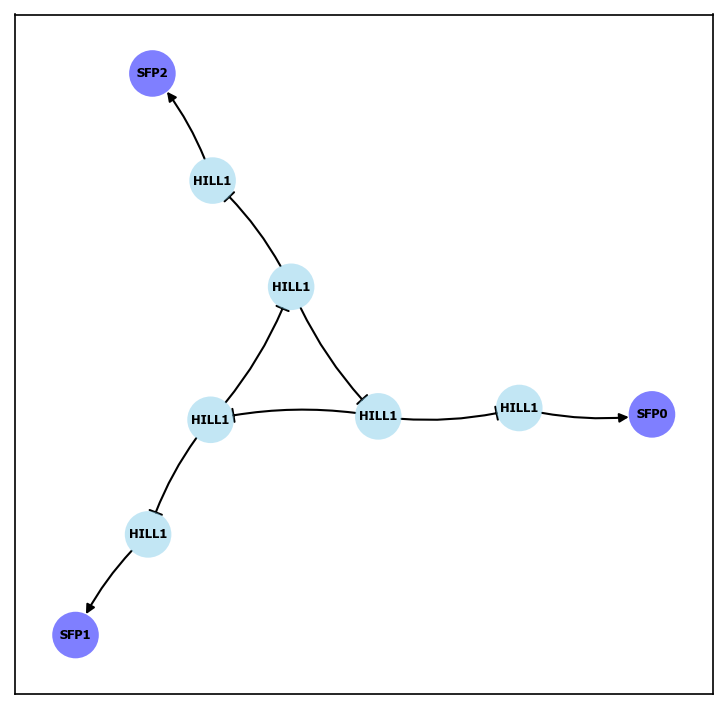

In [132]:
plt.figure(figsize=(6,6), dpi=150)
ring.draw(contracted=True, node_size=500, arrowsize=9, linewidths=0)

In [133]:
def growth_rate(t):
    return 1 # gompertz_growth_rate(t, 0.01, 1, 1, 0.5)

def biomass(t):
    return 1 # gompertz(t, 0.01, 1, 1, 0.5)

metab = SimulatedMetabolism(biomass, growth_rate)

In [134]:
regs[0].init_concentration = 5
reps[0].init_concentration = 5

In [135]:
sample = Sample(genetic_network=ring, 
                    metabolism=metab)

In [136]:
sample.initialize()

In [137]:
rep1 = []
rep2 = []
rep3 = []
for t in range(1000):
    sample.step(0, 1e-2, stochastic=True)
    reporters = sample.reporters
    rep1.append(reporters[0].concentration)
    rep2.append(reporters[1].concentration)
    rep3.append(reporters[2].concentration)

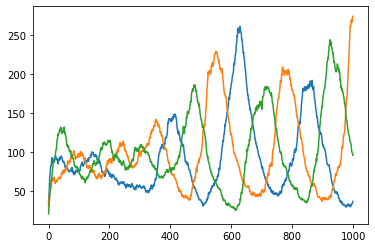

In [138]:
plt.plot(rep1)
plt.plot(rep2)
plt.plot(rep3)